In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE


from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('IoT_Fridge.csv')

In [3]:
set(df['temp_condition'])

{'high', 'high ', 'high  ', 'low', 'low ', 'low  '}

In [4]:
df['temp_condition'] = df['temp_condition'].apply(lambda x: x.strip())

In [5]:
set(df['temp_condition'])


{'high', 'low'}

In [6]:
set(df['time'])

{'   23:06:37   ',
 ' 12:20:52 ',
 '   20:23:06   ',
 '   12:20:09   ',
 '7:09:54',
 '18:11:09',
 ' 09:35:26 ',
 '   14:25:30   ',
 '23:12:04',
 '   14:44:18   ',
 ' 10:42:35 ',
 '4:06:05',
 ' 16:19:58   ',
 ' 11:48:34 ',
 ' 10:51:01 ',
 '22:41:28',
 ' 04:53:39 ',
 '1:16:15',
 ' 02:08:38   ',
 ' 20:33:25   ',
 ' 08:40:38 ',
 '   15:37:03   ',
 ' 17:50:25 ',
 ' 20:59:48 ',
 ' 06:54:12 ',
 ' 07:38:20 ',
 '14:03:20',
 ' 16:22:05 ',
 ' 22:17:41   ',
 ' 04:20:07 ',
 ' 10:48:39 ',
 '   01:42:59   ',
 '   12:38:29   ',
 '   09:15:28   ',
 ' 07:17:11   ',
 ' 10:44:03 ',
 '   08:34:54   ',
 ' 19:04:34 ',
 ' 22:20:11   ',
 '  16:56:10   ',
 '   04:15:01   ',
 ' 14:50:09 ',
 ' 09:04:33   ',
 '   04:20:24   ',
 '   12:03:04   ',
 ' 13:44:54 ',
 '   01:45:24   ',
 ' 07:11:03   ',
 '3:19:44',
 '20:36:59',
 ' 08:44:37 ',
 '21:12:17',
 '   14:20:05   ',
 '  20:04:13   ',
 '0:36:18',
 '3:10:48',
 '16:28:20',
 ' 11:09:54 ',
 ' 14:44:02   ',
 ' 19:21:46 ',
 '   18:05:25   ',
 '9:14:38',
 '   12:37:07   '

In [7]:
def time_to_sec(t:str)->int:
    t = t.strip()
    t = t.split(':')
    t = list(map(int, t))
    return t[0]*3600 + t[1]*60 + t[2]

In [8]:
df['time'] = df['time'].apply(lambda x: time_to_sec(x))

In [9]:
set(df['time'])


{0,
 1,
 2,
 3,
 5,
 6,
 7,
 8,
 10,
 11,
 12,
 13,
 15,
 16,
 17,
 18,
 20,
 21,
 22,
 23,
 25,
 26,
 27,
 28,
 30,
 31,
 32,
 33,
 35,
 36,
 37,
 38,
 40,
 41,
 42,
 43,
 45,
 46,
 47,
 48,
 50,
 51,
 52,
 53,
 55,
 56,
 57,
 58,
 60,
 61,
 62,
 63,
 65,
 66,
 67,
 68,
 70,
 71,
 72,
 73,
 75,
 76,
 77,
 78,
 80,
 81,
 82,
 83,
 85,
 86,
 87,
 88,
 90,
 91,
 92,
 93,
 95,
 96,
 97,
 98,
 100,
 101,
 102,
 103,
 105,
 106,
 107,
 108,
 110,
 111,
 112,
 113,
 115,
 116,
 117,
 118,
 121,
 122,
 123,
 125,
 126,
 127,
 128,
 131,
 132,
 133,
 135,
 136,
 137,
 138,
 141,
 142,
 143,
 145,
 146,
 147,
 148,
 151,
 152,
 153,
 155,
 156,
 157,
 158,
 160,
 161,
 162,
 163,
 166,
 167,
 168,
 170,
 171,
 172,
 173,
 175,
 177,
 178,
 180,
 181,
 182,
 183,
 185,
 186,
 187,
 188,
 190,
 191,
 192,
 193,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 2

In [10]:
set(df['date'])

{'1-Apr-19',
 '17-Apr-19',
 '2-Apr-19',
 '23-Apr-19',
 '24-Apr-19',
 '25-Apr-19',
 '26-Apr-19',
 '27-Apr-19',
 '28-Apr-19',
 '29-Apr-19',
 '3-Apr-19',
 '31-Mar-19',
 '4-Apr-19'}

In [11]:
def date_to_day(d:str)->int:
    month = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6,
             'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
    d = d.strip()
    d = d.split('-')
    return int(d[0]) + month[d[1]]*31 + int(d[2])*365

In [12]:
df['date'] = df['date'].apply(lambda x: date_to_day(x))

In [13]:
set(df['date'])

{7059, 7060, 7061, 7062, 7063, 7076, 7082, 7083, 7084, 7085, 7086, 7087, 7088}

In [14]:
set(df['temp_condition'])

{'high', 'low'}

In [15]:
def encode_temp_condition(t:str)->int:
    return 1 if t=='high' else 0

In [16]:
df['temp_condition'] = df['temp_condition'].apply(lambda x: encode_temp_condition(x))

In [17]:
set(df['temp_condition'])

{0, 1}

In [18]:
df

,date,time,fridge_temperature,temp_condition,label,type
0,7059,45412,13.10,1,0,normal
1,7059,45413,8.65,1,0,normal
2,7059,45414,2.00,0,0,normal
3,7059,45415,4.80,0,0,normal
4,7059,45416,10.70,1,0,normal
...,...,...,...,...,...,...
587071,7086,45677,4.00,0,0,normal
587072,7086,45677,6.05,1,0,normal
587073,7086,45677,12.80,1,0,normal
587074,7086,45678,6.50,1,0,normal


In [19]:
null_df = df.isna().sum()/len(df)*100

null_df

date                 0.00
time                 0.00
fridge_temperature   0.00
temp_condition       0.00
label                0.00
type                 0.00
dtype: float64

In [20]:
print(f'Number of duplicated examples: {len(df.loc[df.duplicated()])}')


Number of duplicated examples: 135048


In [21]:
df.columns

Index(['date', 'time', 'fridge_temperature', 'temp_condition', 'label',
       'type'],
      dtype='object')

<Axes: >

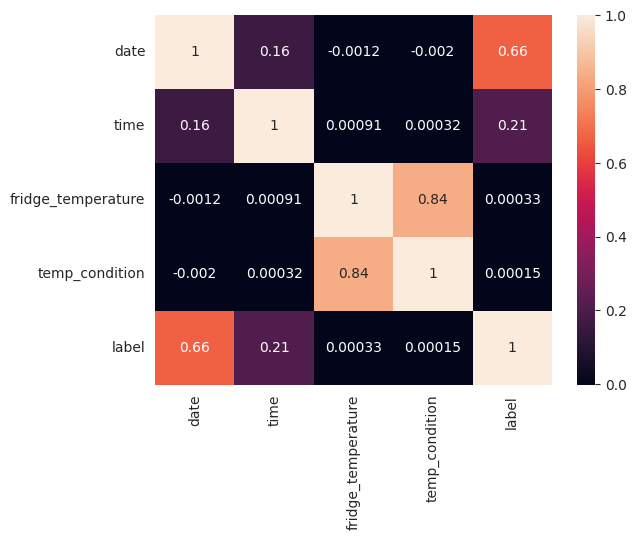

In [22]:
sns.heatmap(df.drop(columns='type').corr(), annot=True)

In [23]:
df = df.drop_duplicates()


In [24]:
print(f'Number of duplicated examples: {len(df.loc[df.duplicated()])}')


Number of duplicated examples: 0


In [25]:
X = df.drop(columns=['type', 'label'])
y = df['label']

In [26]:
X.columns

Index(['date', 'time', 'fridge_temperature', 'temp_condition'], dtype='object')

In [27]:
# Numerical (continuous/discrete) and categorical features

denim='#6F8FAF'
salmon='#FA8072'
slate_gray = '#404040'
cmap=matplotlib.colors.LinearSegmentedColormap.from_list("",[denim,salmon])
sns.set_style('darkgrid')

num_feats = X.select_dtypes(include='number').columns.tolist()

thresh = 25

cont_feats = ['time', 'fridge_temperature']
disc_feats = ['date']
cat_feats = ['temp_condition']

print(f'Features: {X.shape[1]}\n\n\
Continuous: {len(cont_feats)}\n\
{cont_feats}\n\n\
Discrete: {len(disc_feats)}\n\
{disc_feats}\n\n\
Categorical: {len(cat_feats)}\n\
{cat_feats}')

# Customized description and plots for any given feature

def summary(feat):

    if feat in cont_feats:
        cont_summary(feat)
        cont_plots(feat)
    elif feat in disc_feats:
        disc_summary(feat)
        disc_plots(feat)
    else:
        cat_summary(feat)
        cat_plots(feat)

    missing_flag_plot(feat)

    return

# Customized description for continuous features

def cont_summary(feat):

    # Create an empty summary
    columns = ['dtype', 'count', 'unique', 'top_value_counts', 'missing_count',
               'missing_percentage','mean', 'std', 'min', 'median', 'max',
               'corr_with_target']
    summary = pd.DataFrame(index=[feat],columns=columns,dtype=float)

    # Pull the feature column in question
    col = X[feat].copy()

    # Basic statistics using the original describe method
    summary.loc[feat,['count','mean', 'std', 'min', 'median', 'max']]\
        = col.describe(percentiles=[.5]).values.transpose()

    # Number of unique values
    summary.loc[feat,'unique'] = col.nunique()

    # Missing values count
    summary.loc[feat,'missing_count'] = col.isnull().sum()

    # Missing values percentage
    summary.loc[feat,'missing_percentage'] = col.isnull().sum()/len(col)*100

    # Correlation with target
    summary.loc[feat,'corr_with_target'] = col.corr(y)

    int_cols = ['count', 'unique', 'missing_count']
    summary[int_cols] = summary[int_cols].astype(int)
    summary = summary.round(2).astype(str)

    # Top 3 value_counts
    value_counts = X[feat].value_counts().head(3)
    value_counts.index = value_counts.index.astype(float).to_numpy().round(2)
    summary.loc[feat,'top_value_counts'] = str(value_counts.to_dict())

    # Data type
    summary.loc[feat,'dtype'] = col.dtypes

    return display(summary)

# Customized plots for continuous features

def cont_plots(feat,bins='auto'):

    n_cols = 3
    fig, axes = plt.subplots(1, n_cols, figsize=(6.4*n_cols, 4.8))

    # Histogram
    sns.histplot(data=X,
                 x=feat,
                 bins=bins,
                 ax=axes[0],
                 color=slate_gray)

    # Box plots with the target as hue
    sns.boxplot(data=X,
                x=feat,
                y=y,
                ax=axes[1],
                orient='h')

#     KDE plots with the target as hue
    sns.kdeplot(data=X,
                x=feat,
                hue=y,
                fill=True,
                common_norm=False,
                ax=axes[2])

    axes[0].title.set_text('Histogram')
    axes[1].title.set_text('Box Plots')
    axes[2].title.set_text('KDE Plots')

    fig.tight_layout()
    plt.show()
    return

# Customized description for discrete features

def disc_summary(feat):

    # Create an empty summary
    columns = ['dtype', 'count', 'unique', 'missing_count', 'missing_percentage',
               'mean', 'std', 'min', 'median', 'max', 'cv', 'corr_with_target']
    summary = pd.DataFrame(index=[feat],columns=columns,dtype=float)

    # Pull the feature column in question
    col = X[feat].copy()

    # Basic statistics using the original describe method
    summary.loc[feat,['count','mean', 'std', 'min', 'median', 'max']]\
    = col.describe(percentiles=[.5]).values.transpose()

    # Number of unique values
    summary.loc[feat,'unique'] = col.nunique()

    # Coefficient of Variation (CV)
    summary.loc[feat,'cv'] = np.NaN if not col.mean() else col.std()/col.mean()

    # Missing values count
    summary.loc[feat,'missing_count'] = col.isnull().sum()

    # Missing values percentage
    summary.loc[feat,'missing_percentage'] = col.isnull().sum()/len(col)*100

    # Correlation with target
    summary.loc[feat,'corr_with_target'] = col.corr(y)

    int_cols = ['count','unique','missing_count']
    summary[int_cols] = summary[int_cols].astype(int)
    summary = summary.round(2).astype(str)

    # Data type
    summary.loc[feat,'dtype'] = col.dtypes


    return display(summary)

# Customized plots for discrete features

def disc_plots(feat):

    col = X[feat].copy()

    n_rows = 1
    n_cols = 2

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6.4 * n_cols, 4.8 * n_rows))

    # Sort unique values
    unique_values = col.dropna().unique()
    unique_values.sort()

    # Value counts
    val_counts = col.dropna().value_counts()
    val_counts = val_counts.reindex(unique_values)
    val_counts_pct = val_counts/len(col)*100

    # Countplot
    sns.countplot(x=col, order=unique_values, ax=axes[0])
    axes[0].xaxis.grid(False)

    # Show count value if rare (less than 1%)
    lp_thresh = 1
    for i, p in enumerate(axes[0].patches):
        pct = val_counts_pct.iloc[i]
        axes[0].annotate(f'{pct:.2f}%',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='bottom', xytext=(0,0),
                         textcoords='offset points')
        if pct < lp_thresh:
            axes[0].annotate(val_counts.iloc[i],
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='bottom', xytext=(0,10),
                             textcoords='offset points',color='red')

    # Barplot
    df = pd.concat([X, y],axis=1).groupby(feat)['label'].mean()*100
    df = df.reindex(unique_values)  # Reindex to match the order
    sns.barplot(x=df.index, y=df.values, ax=axes[1])
    axes[1].set_ylabel('label %')
    axes[1].xaxis.grid(False)

    fig.tight_layout()
    plt.show()

    return

# Customized description for categorical features

def cat_summary(feat):

    # Create an empty summary
    columns = ['dtype', 'count', 'unique', 'missing_count', 'missing_percentage']
    summary = pd.DataFrame(index=[feat],columns=columns,dtype=float)

    # Pull the feature column in question
    col = X[feat].copy()

    # Count
    summary.loc[feat,'count'] = col.count()

    # Number of unique values
    summary.loc[feat,'unique'] = col.nunique()

    # Missing values count
    summary.loc[feat,'missing_count'] = col.isnull().sum()

    # Missing values percentage
    summary.loc[feat,'missing_percentage'] = col.isnull().sum()/len(col)*100

    int_cols = ['count', 'unique', 'missing_count']
    summary[int_cols] = summary[int_cols].astype(int)
    summary = summary.round(2).astype(str)

    # Data type
    summary.loc[feat,'dtype'] = col.dtypes

    return display(summary)

# Customized plots for categorical features

def cat_plots(feat):

    col = X[feat].copy()

    n_rows = 1
    n_cols = 2

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6.4 * n_cols, 4.8 * n_rows))

    # Value counts
    val_counts = col.dropna().value_counts()

    # Unique values
    unique_values = val_counts.index

    # Countplot with sorted order
    sns.countplot(x=col, order=unique_values, ax=axes[0])
    axes[0].xaxis.grid(False)

    val_counts_pct = val_counts/len(col)*100

    # Show count value if rare (less than 1%)
    lp_thresh = 1
    for i, p in enumerate(axes[0].patches):
        pct = val_counts_pct.iloc[i]
        axes[0].annotate(f'{pct:.2f}%',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='bottom', xytext=(0,0),
                         textcoords='offset points')
        if pct < lp_thresh:
            axes[0].annotate(val_counts.iloc[i],
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='bottom', xytext=(0,10),
                             textcoords='offset points',color='red')

    # Barplot with the same order
    df = pd.concat([X, y],axis=1).groupby(feat)['label'].mean()*100
    sns.barplot(x=df.index, y=df.values, order=unique_values, ax=axes[1])
    axes[1].set_ylabel('Fraud %')
    axes[1].xaxis.grid(False)

    fig.tight_layout()
    plt.show()

    return

# Plot for the missing flag associated with a feature

def missing_flag_plot(feat):
    col = X[feat].isnull().astype(int)

    if not col.sum():
        return

    df = (pd.concat([col,y],axis=1).groupby(feat).mean()*100).reset_index()
    cols = [f'MISSING_FLAG_{feat}', 'Fraud %']
    df.columns = cols
    fig = plt.figure(figsize=(6.4, 4.8))
    ax = sns.barplot(data=df,x=cols[0], y=cols[1])

    fig.tight_layout()
    plt.show()

    return

Features: 4

Continuous: 2
['time', 'fridge_temperature']

Discrete: 1
['date']

Categorical: 1
['temp_condition']


 Feature: 'temp_condition'



,dtype,count,unique,missing_count,missing_percentage
temp_condition,int64,452028,2,0,0.0


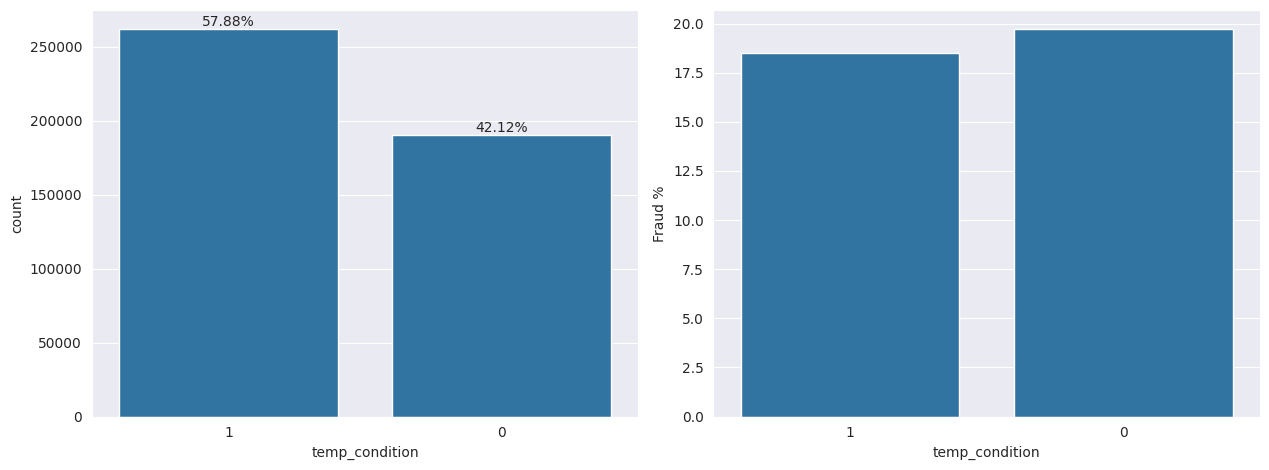

--------------------------------------------- 



In [28]:
for feat in cat_feats:
    print(f"\033[1m Feature:\033[0m '{feat}'\n")
    summary(feat)
    print('-'*45,'\n')

 Feature: 'time'



,dtype,count,unique,top_value_counts,missing_count,missing_percentage,mean,std,min,median,max,corr_with_target
time,int64,452028,80056,"{15732.0: 148, 15738.0: 143, 15752.0: 143}",0,0.0,37009.37,24649.7,0.0,30983.5,86398.0,0.19


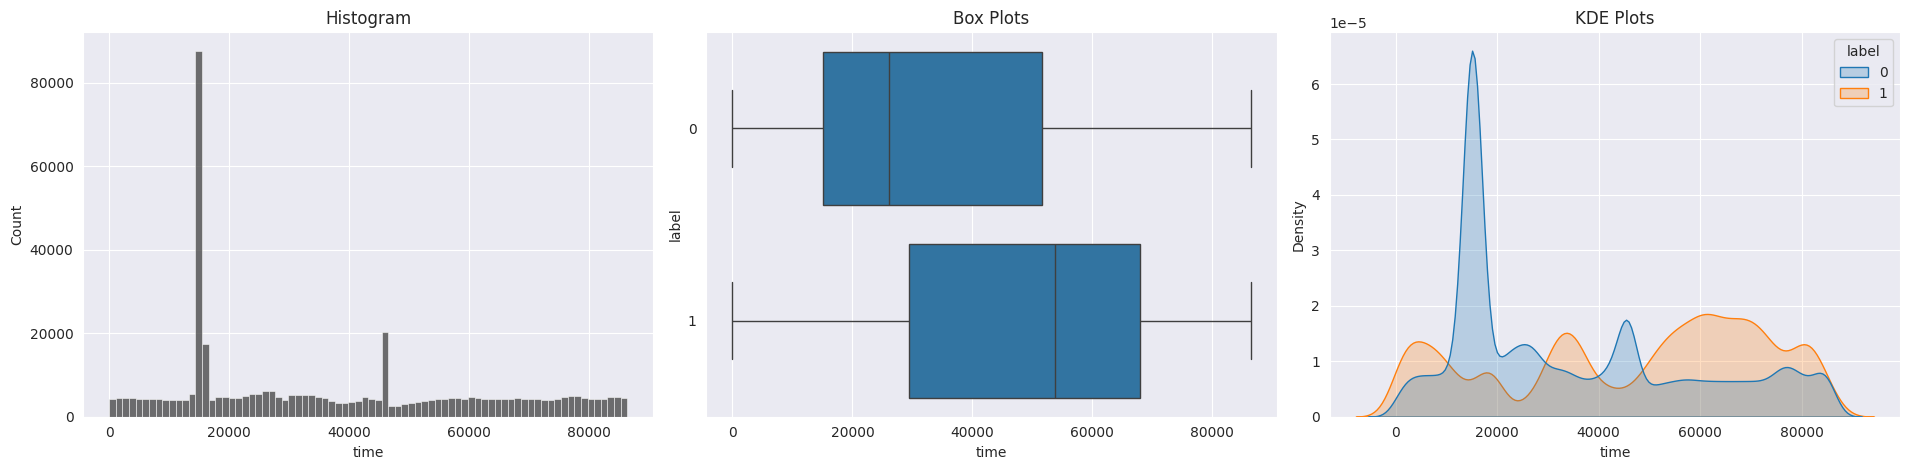

--------------------------------------------- 

 Feature: 'fridge_temperature'



,dtype,count,unique,top_value_counts,missing_count,missing_percentage,mean,std,min,median,max,corr_with_target
fridge_temperature,float64,452028,151,"{1.0: 13918, 3.0: 13863, 4.0: 13853}",0,0.0,7.27,3.59,1.0,6.85,14.0,-0.02


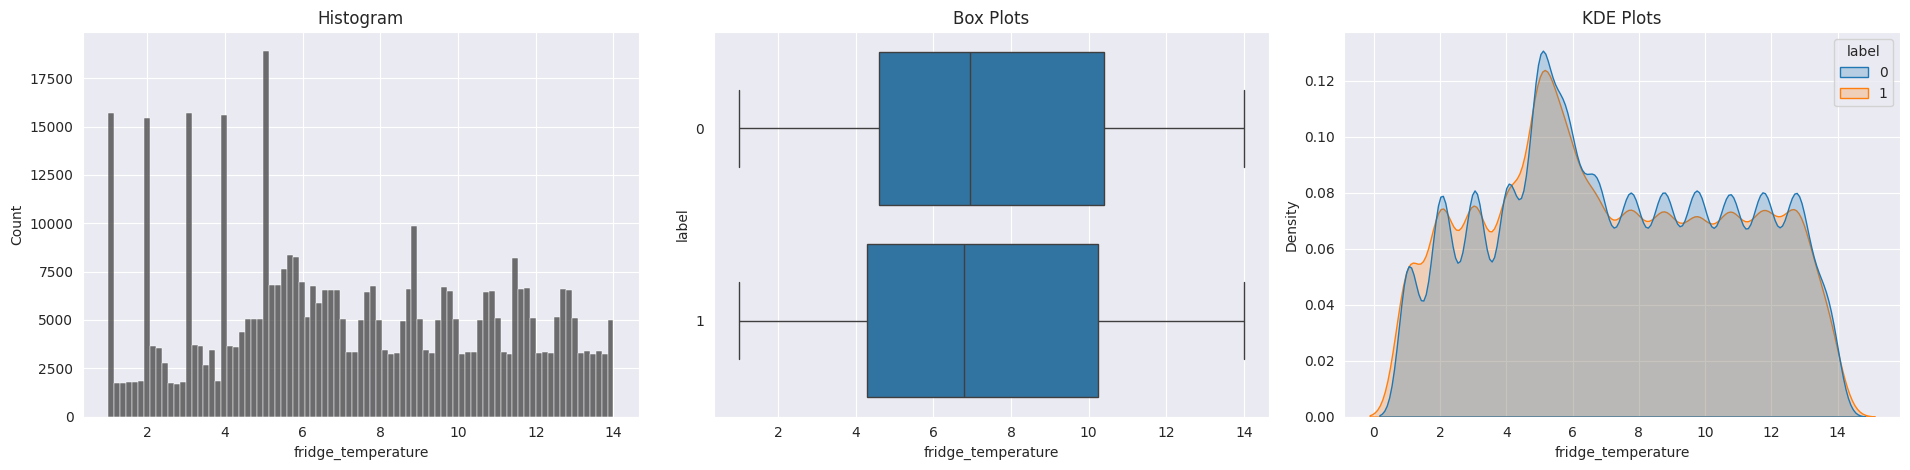

--------------------------------------------- 



In [29]:
for feat in cont_feats:
    print(f"\033[1m Feature:\033[0m '{feat}'\n")
    summary(feat)
    print('-'*45,'\n')

 Feature: 'date'



,dtype,count,unique,missing_count,missing_percentage,mean,std,min,median,max,cv,corr_with_target
date,int64,452028,13,0,0.0,7070.17,11.85,7059.0,7062.0,7088.0,0.0,0.64


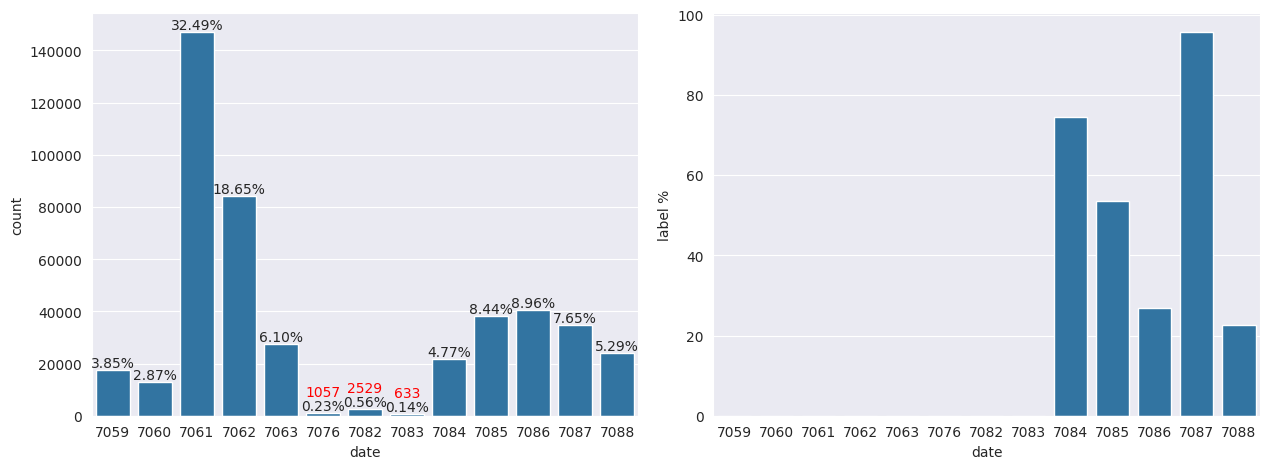

--------------------------------------------- 



In [30]:
for feat in disc_feats:
    print(f"\033[1m Feature:\033[0m '{feat}'\n")
    summary(feat)
    print('-'*45,'\n')

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

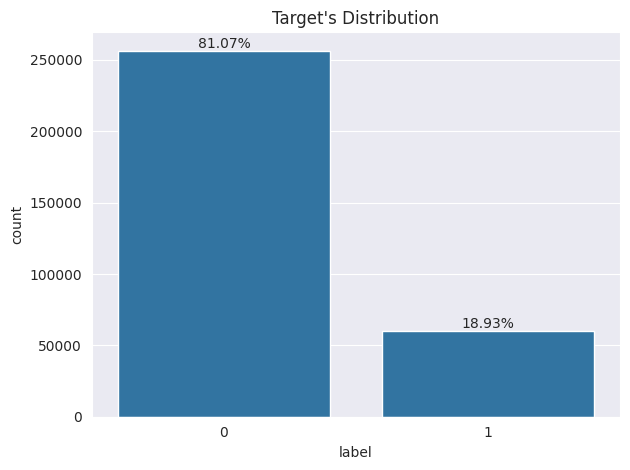

In [32]:
fig = plt.figure(figsize=(6.4,4.8))

# Sort unique values
unique_values = y_train.dropna().unique()
unique_values.sort()

# Value counts
val_counts = y_train.dropna().value_counts()
val_counts = val_counts.reindex(unique_values)

val_counts_pct = val_counts/len(y_train)*100

# Countplot
ax = sns.countplot(x=y_train)
ax.xaxis.grid(False)

# Annotating the bars with value counts percentages
lp_thresh = 1
for i, p in enumerate(ax.patches):
    pct = val_counts_pct.iloc[i]
    ax.annotate(f'{pct:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0,0), textcoords='offset points')
    # Showing count value if rare (less than 1%)
    if pct < lp_thresh:
        ax.annotate(val_counts.iloc[i], (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0,10), textcoords='offset points',color='red')

ax.set_title("Target's Distribution")

plt.tight_layout()
plt.show()

In [33]:
print(f'Before SMOTE:\n y_train True = {sum(y_train == 1)}, y_train False = {sum(y_train==0)}')
sm = SMOTE(random_state = 42)
X_train, y_train = sm.fit_resample(X_train, y_train)
print(f'After SMOTE:\n y_train True = {sum(y_train == 1)}, y_train False = {sum(y_train==0)}')

Before SMOTE:
 y_train True = 59892, y_train False = 256527
After SMOTE:
 y_train True = 256527, y_train False = 256527


In [ ]:
y_train = pd.DataFrame(y_train)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
x_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
x_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [36]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

In [37]:
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models  

 97%|█████████▋| 30/31 [4:24:00<10:11, 611.47s/it]    

[LightGBM] [Info] Number of positive: 256527, number of negative: 256527
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002744 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 527
[LightGBM] [Info] Number of data points in the train set: 513054, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 31/31 [4:24:02<00:00, 511.04s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,0.99,0.99,0.99,0.99,11.01
RandomForestClassifier,0.99,0.99,0.99,0.99,49.52
XGBClassifier,0.99,0.99,0.99,0.99,2.38
LGBMClassifier,0.99,0.99,0.99,0.99,1.61
ExtraTreesClassifier,0.99,0.99,0.99,0.99,18.26
DecisionTreeClassifier,0.99,0.99,0.99,0.99,1.64
KNeighborsClassifier,0.98,0.99,0.99,0.98,8.14
ExtraTreeClassifier,0.99,0.98,0.98,0.99,0.29
AdaBoostClassifier,0.94,0.96,0.96,0.94,11.69
